In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

In [4]:
data.shape

(215, 15)

In [5]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [44]:
data.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [45]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


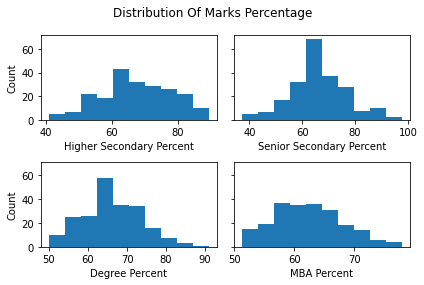

In [46]:
fig, ax = plt.subplots(2, 2, sharey=True)
ax[0, 0].hist(data.ssc_p, bins=10)
ax[0, 1].hist(data.hsc_p, bins=10)
ax[1, 0].hist(data.degree_p, bins=10)
ax[1, 1].hist(data.mba_p, bins=10)

ax[0, 0].set_ylabel("Count")
ax[1, 0].set_ylabel("Count")
ax[0, 0].set_xlabel("Higher Secondary Percent")
ax[0, 1].set_xlabel("Senior Secondary Percent")
ax[1, 0].set_xlabel("Degree Percent")
ax[1, 1].set_xlabel("MBA Percent")
fig.suptitle("Distribution Of Marks Percentage")
plt.tight_layout()
plt.show()


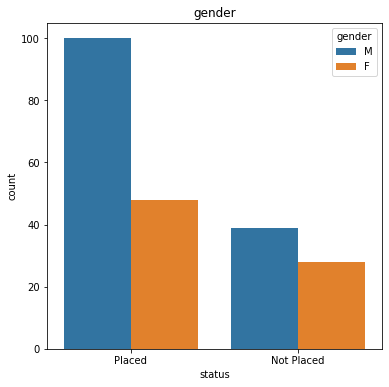

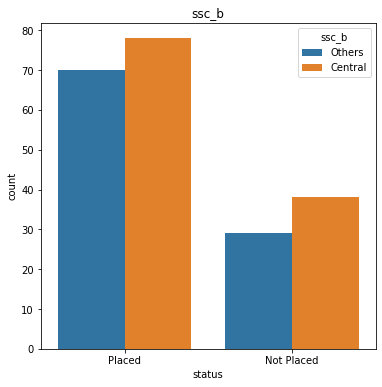

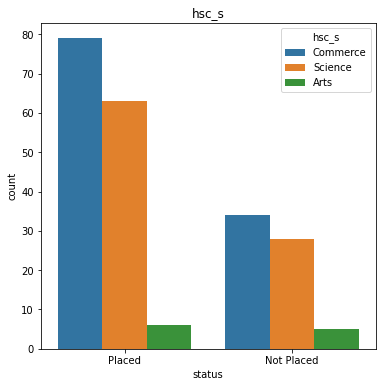

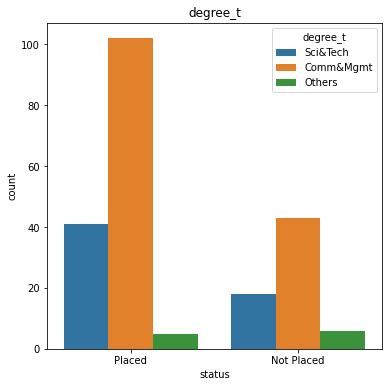

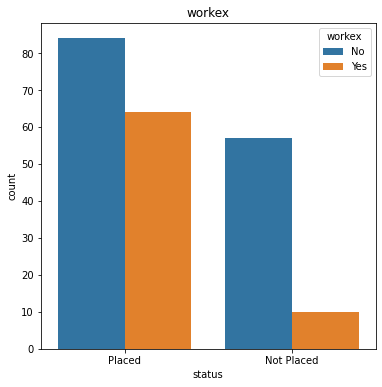

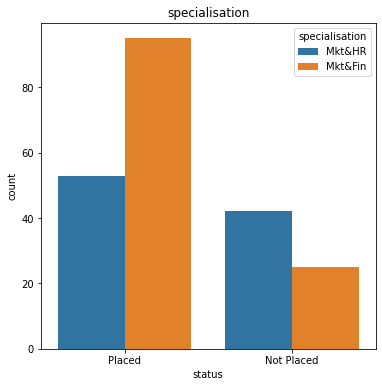

In [47]:
col_list = ["gender", "ssc_b", "hsc_s", "degree_t", "workex", "specialisation"]
for g in col_list:
    plt.figure(figsize=(6, 6))
    sns.countplot(
        data=data,
        x="status",
        hue=g,
    )
    plt.title(f"{g}")
    plt.show()

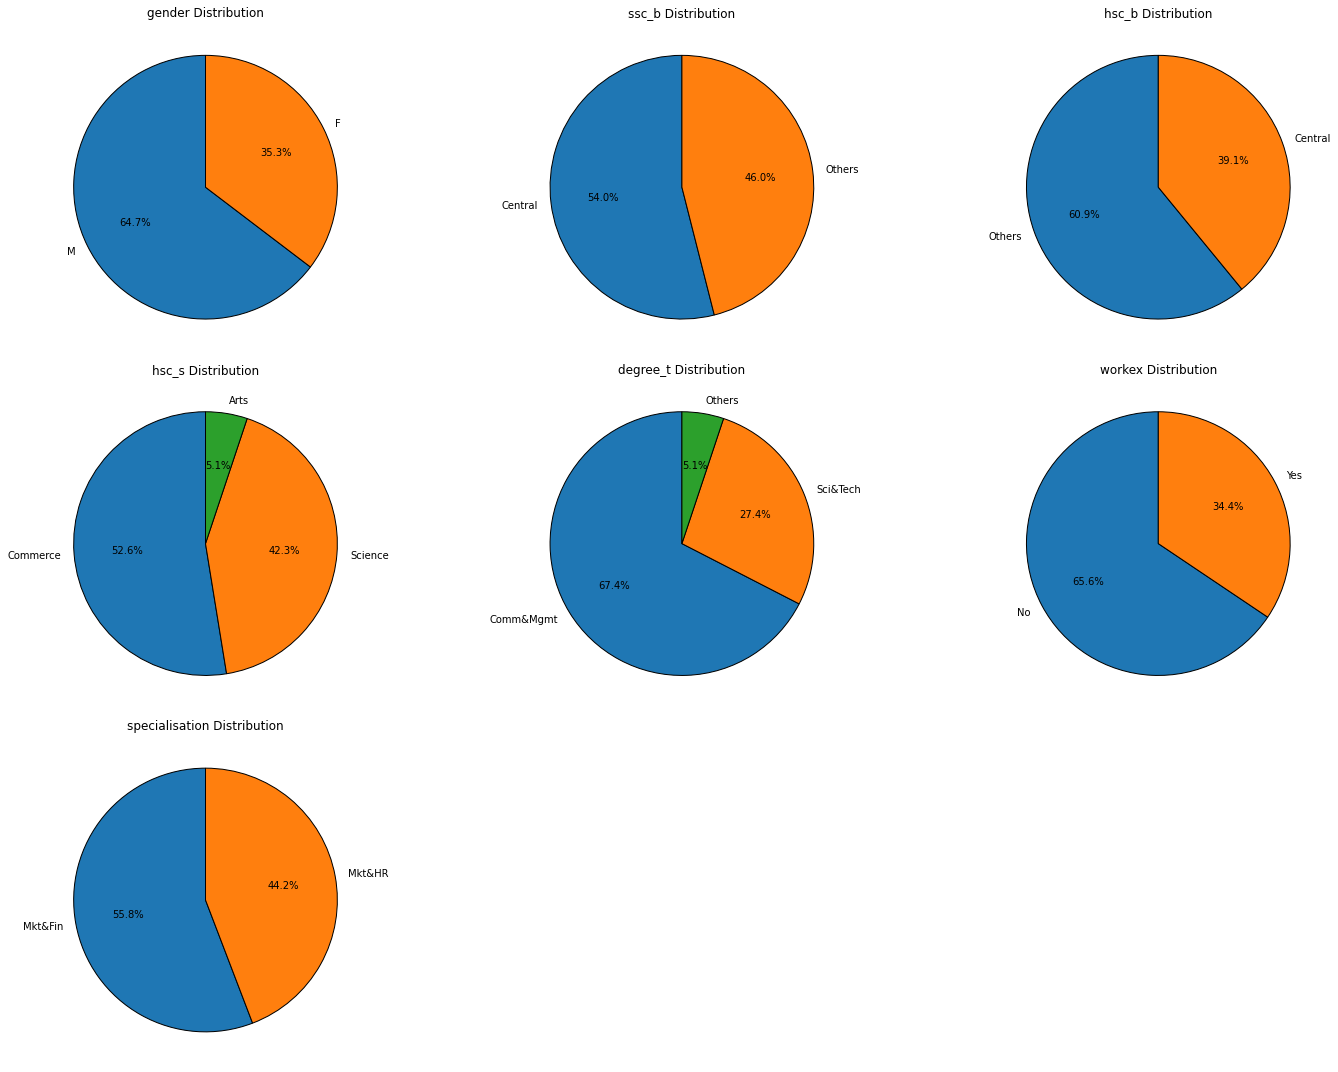

In [48]:
cat_vars = ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
            'degree_t', 'workex', 'specialisation']
# create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))


# create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # count the number of occurrences for each category
        cat_counts = data[var].value_counts()

        # create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor':'black'})

        # set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# remove the eighth and ninth subplot
fig.delaxes(axs[2, 2])  # 2 represents the row index, and 2 represents the column index
fig.delaxes(axs[2, 1])  # 2 represents the row index, and 1 represents the column index

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


In [49]:
data.replace({'M':1, 'F':0, 'Central':1, 'Mkt&HR':0, 'Mkt&Fin':1, 'Yes':1, 'No':0, 'Placed':1, 'Not Placed':0}, inplace = True)
data['ssc_b'].replace({'Others':0}, inplace = True)
data['hsc_b'].replace({'Others':0}, inplace = True)
data['salary'].fillna(0, inplace = True)
data['salary'] = data['salary'].astype('int64')
data = pd.get_dummies(data = data, columns = ['hsc_s', 'degree_t'])

<AxesSubplot:>

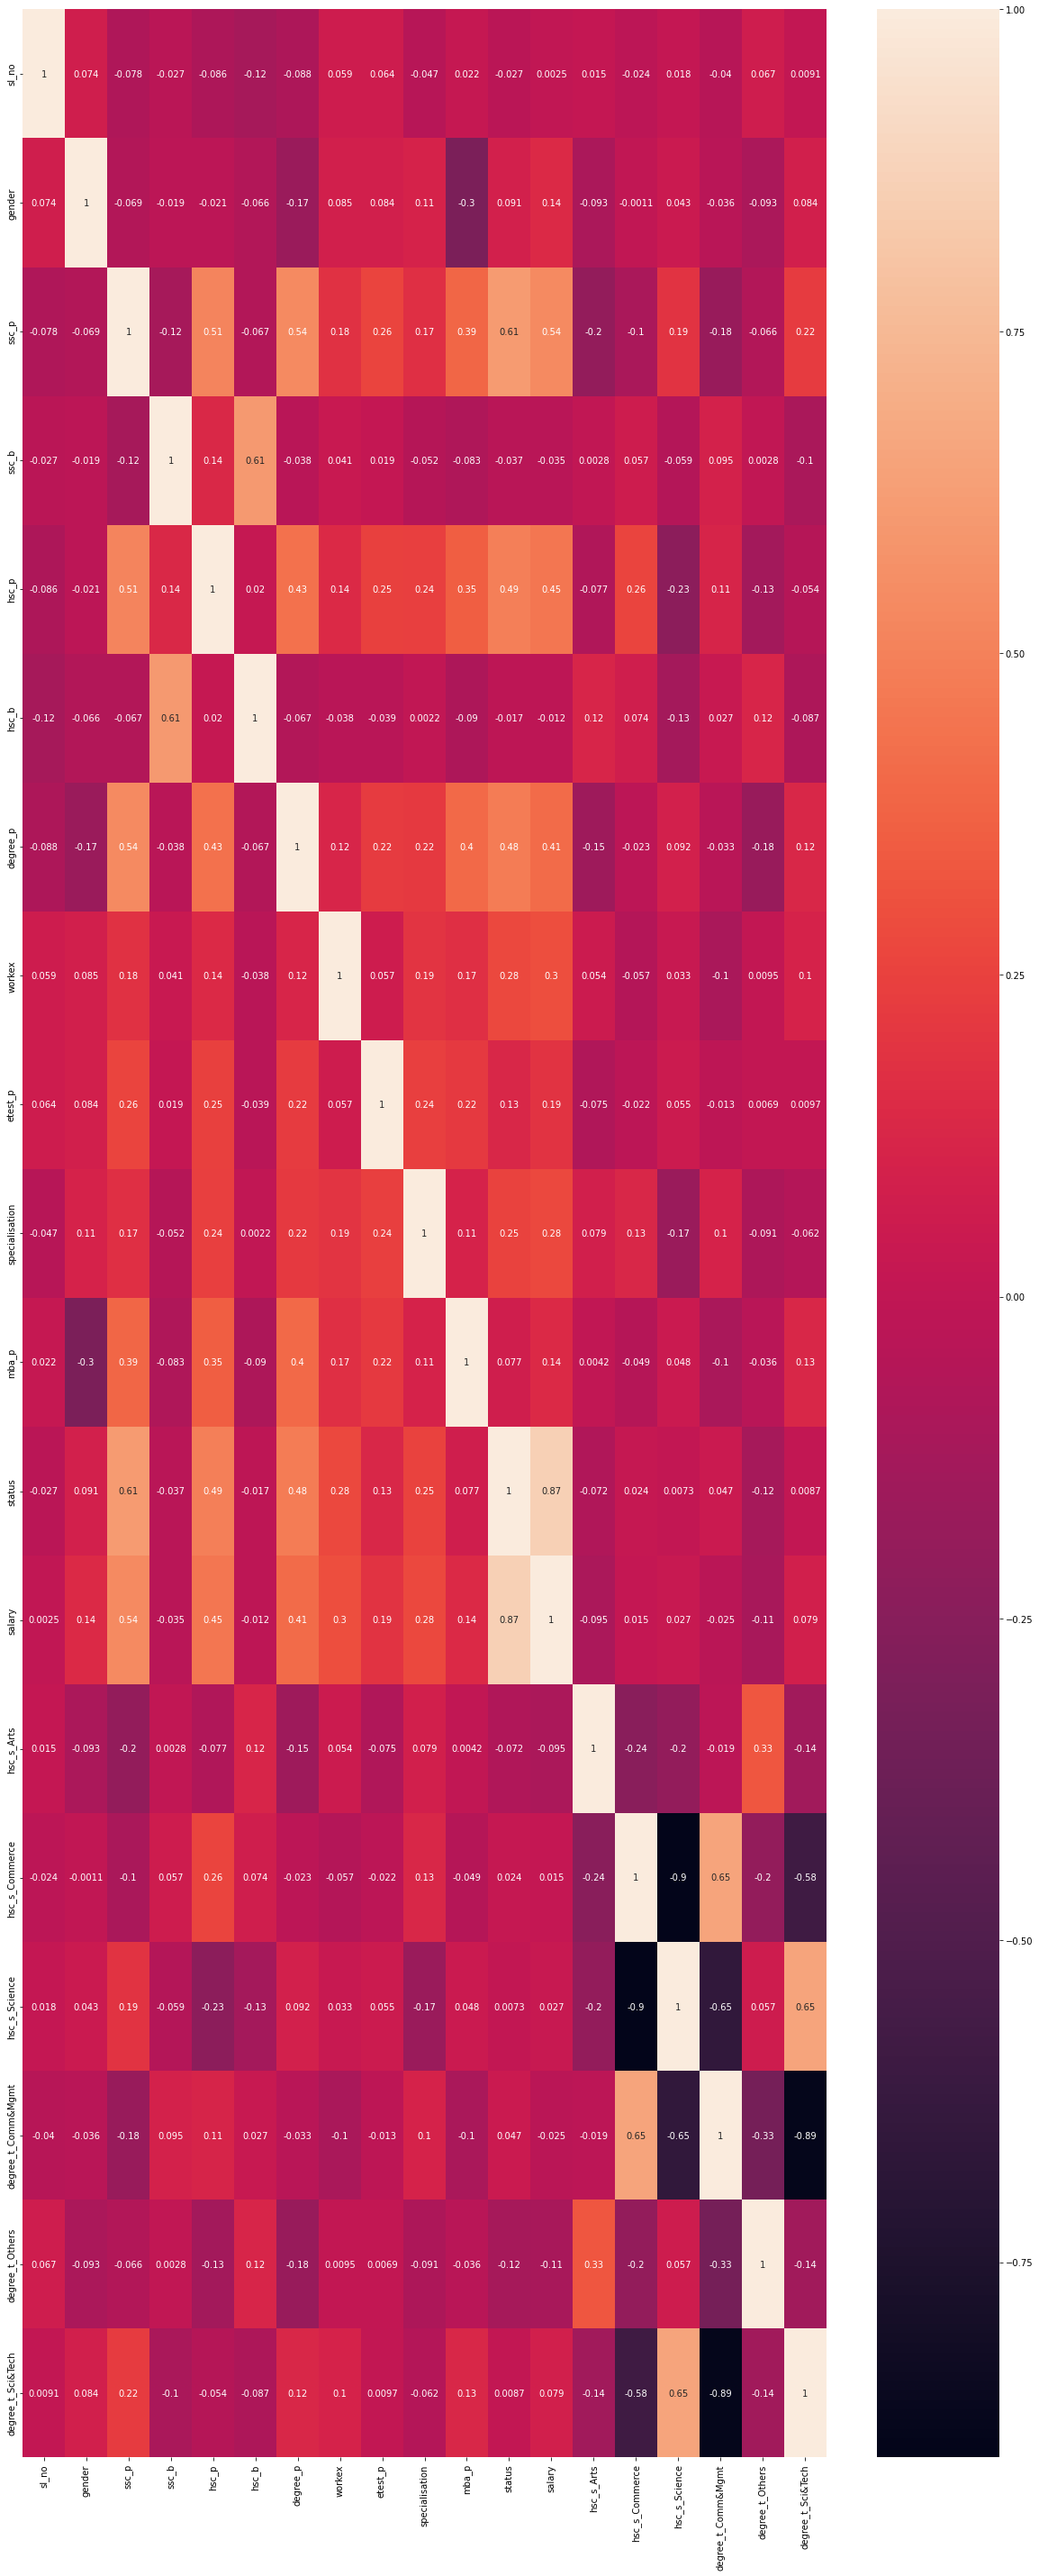

In [50]:
plt.figure(figsize = (20, 50))
sns.heatmap(data.corr(), annot = True)

In [51]:
data.drop(['sl_no', 'hsc_s_Commerce', 'degree_t_Comm&Mgmt'], inplace = True, axis = 'columns')

<AxesSubplot:>

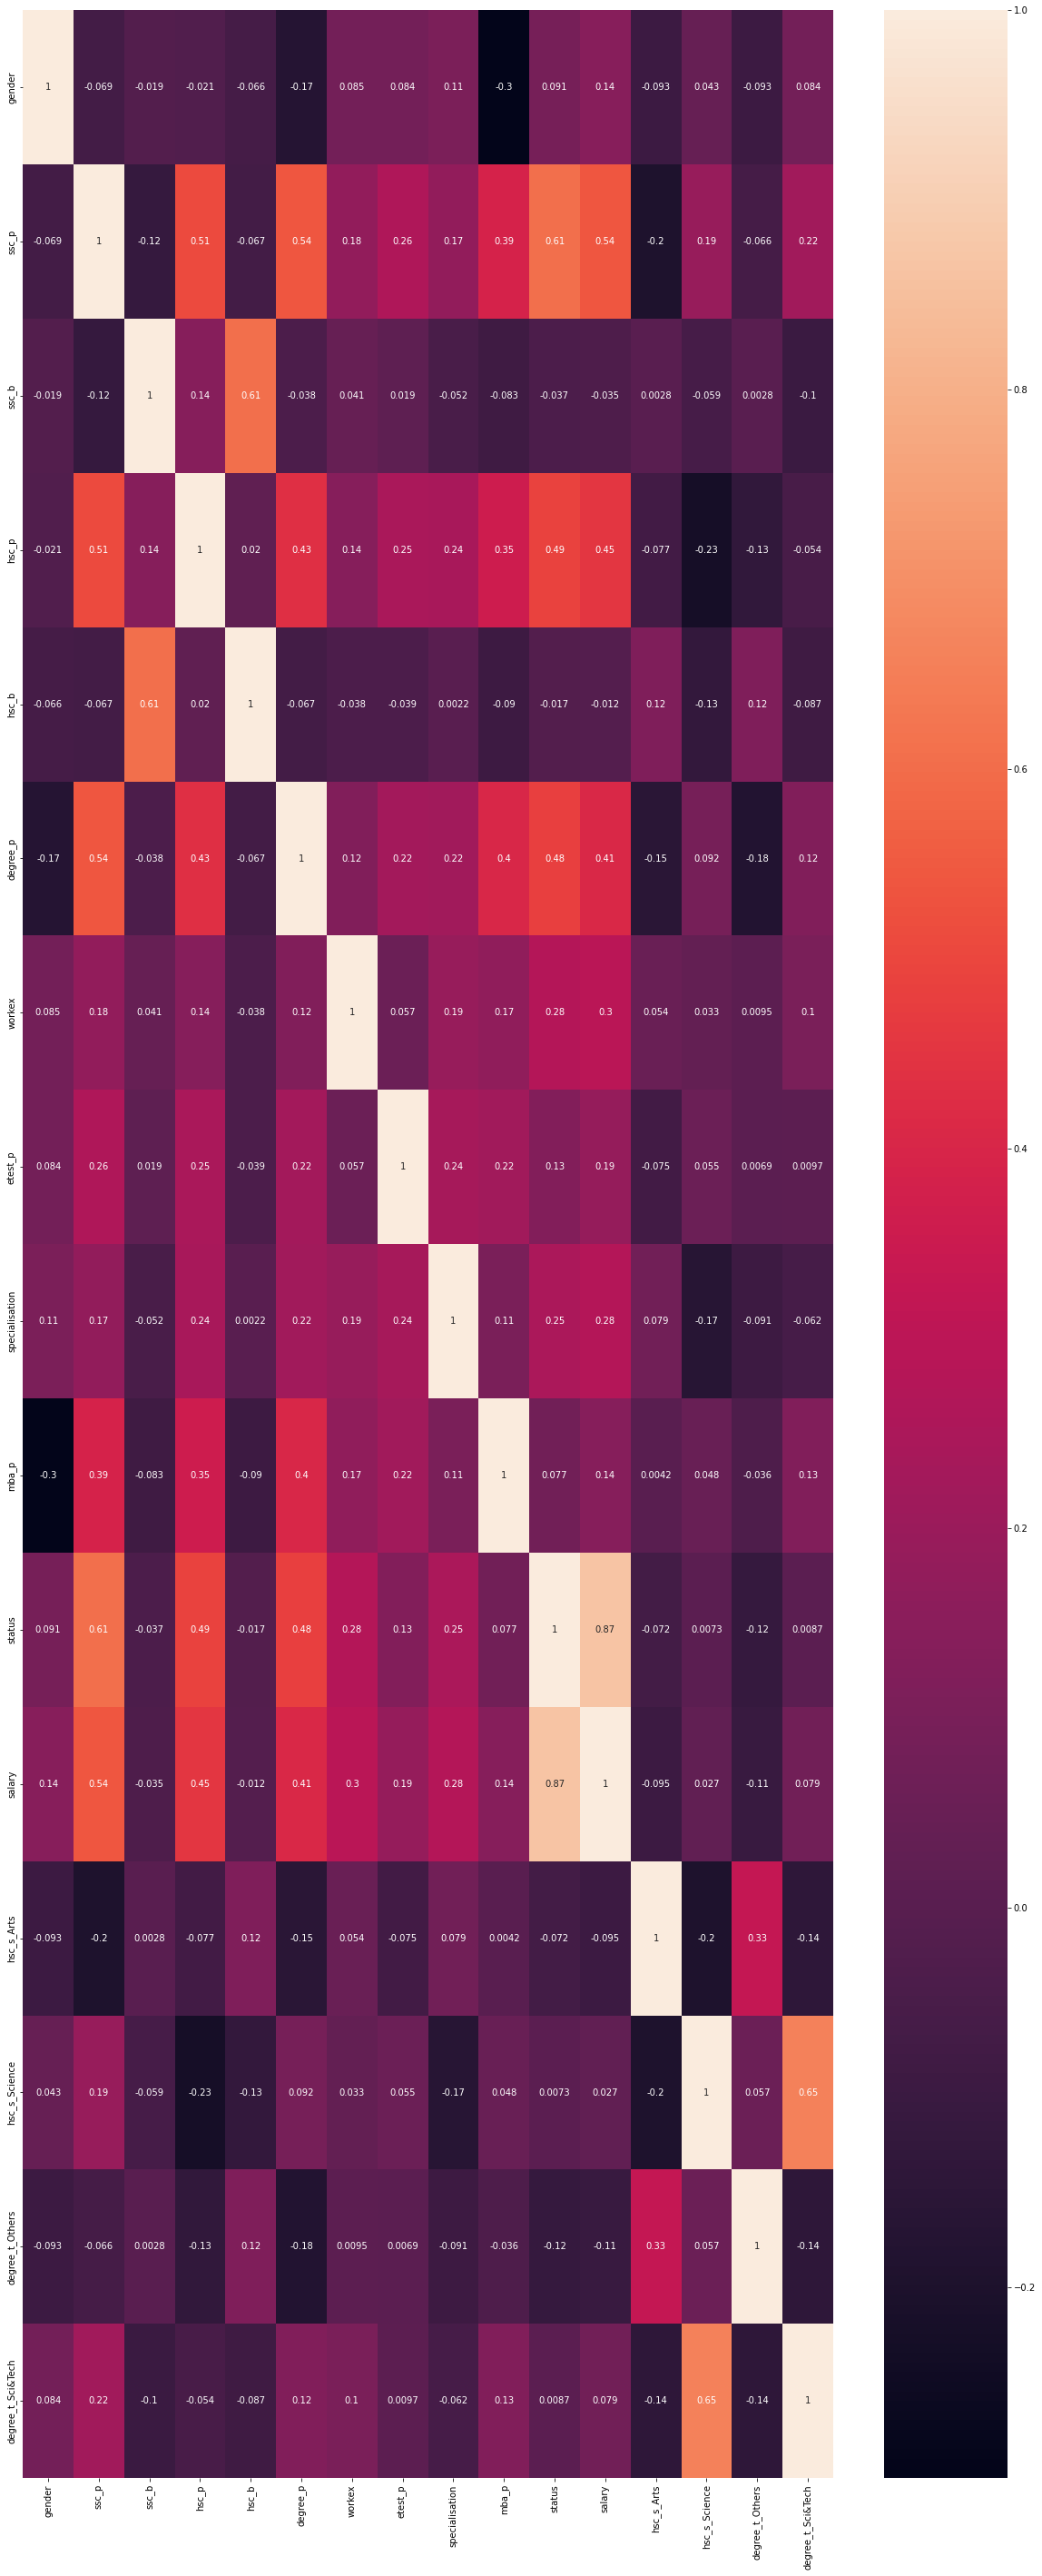

In [52]:
plt.figure(figsize = (20, 50))
sns.heatmap(data.corr(), annot = True)

In [53]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,salary,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,1,270000,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,1,200000,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,250000,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,0,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,1,425000,0,0,0,0


In [54]:
data_copy = data.copy()
Y = data_copy['status']
X = data_copy.drop(['salary', 'status'], axis = 'columns')

In [55]:
X.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech
0,1,67.00,0,91.00,0,58.00,0,55.0,0,58.80,0,0,0,1
1,1,79.33,1,78.33,0,77.48,1,86.5,1,66.28,0,1,0,1
2,1,65.00,1,68.00,1,64.00,0,75.0,1,57.80,1,0,0,0
3,1,56.00,1,52.00,1,52.00,0,66.0,0,59.43,0,1,0,1
4,1,85.80,1,73.60,1,73.30,0,96.8,1,55.50,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train, Y_train)

c:\Users\Abishek R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
Y_pred = model.predict(X_test)

In [61]:
print("Accuracy Score = ", accuracy_score(Y_test, Y_pred))
print("Precision Score = ", precision_score(Y_test, Y_pred))
print("Recall Score = ", recall_score(Y_test, Y_pred))
print("F1 Score = ", f1_score(Y_test, Y_pred))

Accuracy Score =  0.8837209302325582
Precision Score =  0.9032258064516129
Recall Score =  0.9333333333333333
F1 Score =  0.9180327868852459


In [62]:
import pickle

In [63]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)